# - LAB1 : Study Learning Rate Scheduler and Regularization Techiques (40min)
#### LAB1 에서는 Learning Rate Scheduler의 Pytorch module인 optim.lr_scheduler와 Early stopping, Dropout, Batch Normalization, Weight decay와 같은 Regularization Techiques에 대해 실습을 할 계획입니다.

# Learning Rate Scheduler (15min)

## 1) Learning Rate Scheduler : optim.lr_scheduler
 - [doc] (https://pytorch.org/docs/stable/optim.html)

 ![image.png](http://drive.google.com/uc?id=1LsHW_g90NRBemBEm-1Bn-0et0qDNyi8v)

 ![image.png](http://drive.google.com/uc?id=1SoKAf7efPEdaW9JjzWlOcrD_YpQ5WtUg)

 ![image.png](http://drive.google.com/uc?id=1YWnNY-SHX56ften_lbXARStqA8lVwkLg)

 - [ optimizer class ]

 ![image.png](http://drive.google.com/uc?id=1Ab6eMphYOE15DPMd_wBKW0HwsDM6mlfV)

 - [ scheduler function ]

 ![image.png](http://drive.google.com/uc?id=1Ri1piSSdPng993SCk0vGqDGuoiD5aDqd)

 ![image.png](http://drive.google.com/uc?id=1cU3Et1QbKPf4jKoCwK14jDz3SgVkRG8N)

In [ ]:
# 패키지 import
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torchsummary import summary

In [ ]:
# Model 설정
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
    
    def forward(self, x):
        x = x.view(-1, 784)
        x = nn.relu(self.fc1(x))
        x = nn.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = Net()

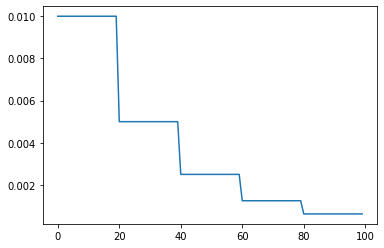

In [ ]:
# Parameter 설정
########################################## Change This Code~!
EPOCHS = 100
LR = 0.01
STEP_SIZE = 20
GAMMA = 0.5
########################################## Change This Code~!

# Optimizer 및 Scheduler 설정
optimizer = optim.SGD(model.parameters(), lr=LR)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=STEP_SIZE, gamma=GAMMA) # step size마다 gamma 비율로 lr을 감소시킨다. (step_size 마다 gamma를 곱한다.)

def get_lr(optimizer, scheduler): # Training 코드
    lr = scheduler.get_last_lr()[0]
    optimizer.step()
    scheduler.step() # Scheduler를 사용한다면 필수적으로 들어가야함
    return lr

plt.plot(torch.arange(EPOCHS), [get_lr(optimizer, scheduler) for t in range(EPOCHS)])

# Regularization Techniques (25min)

## 1) Early Stopping

![image.png](http://drive.google.com/uc?id=1XLFESsMp9__BN09LJyulKEBY9c8OqKGP)

![image.png](http://drive.google.com/uc?id=1mWLiGVbZZoz2kM8XeOv45A5kTAYmh3We)


In [ ]:
# Early Stopping Algorithm

count = 0
valid_acc = 0
for epcho in range(EPOCHS): # training loop
    for idx, (image, target) in enumerate(valid_loader): # at each epoch
        output = model(image) # model inference
        valid_acc = accuracy(output, target) # calculate valid accuracy
        if valid_acc > best_valid_acc: # Valid dataset에 대한 accuracy가 계속 증가하고 있으면 --> count=0, model 저장
            best_valid_acc = valid_acc
            torch.save(model.state_dict(), path) # save best model
            count = 0
        else: # Valid Accuracy가 증가하지 않을 때 
            count += 1
            if count >= 3: # 연속 3번 epoch 동안 accuracy가 best accuracy보다 크지 못하다면
                break # Early Stopping Point 이다.


## 2) Batch Normalization : nn.BatchNorm2d


![image.png](http://drive.google.com/uc?id=1eYc8TFEtx-MsgdVGV1C4sKJNHh9GqObH)
- Internal Covariance Shift

 ![image.png](http://drive.google.com/uc?id=1425nKR9u1tNDmPDCU3M-BkkcMaYYoP1e)

- [doc] (https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm2d.html)

 ![image.png](http://drive.google.com/uc?id=1sId2CSNqxKncTueKwgtIoBzEMvSfAvhx)
 ![image.png](http://drive.google.com/uc?id=1fycDf_67C9OBV1GHZBmwD4P83iNtS5XL)
 ![image.png](http://drive.google.com/uc?id=1dDAMt76ZNg1stRVXMs_gYrz7CBw-PbmA)


In [ ]:
# Model 설정
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(784, 256)
        self.bn1 = nn.BatchNorm1d(num_features=256) # x가 2-dim 이면 nn.BatchNorm2d
        self.fc2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(num_features=128) # x가 2-dim 이면 nn.BatchNorm2d
        self.fc3 = nn.Linear(128, 10)
    
    def forward(self, x):
        x = x.view(-1, 784)
        ########################################## Change This Code~!
        x = self.relu(self.bn1(self.fc1(x)))
        x = self.relu(self.bn2(self.fc2(x)))
        ########################################## Change This Code~!
        x = self.fc3(x)
        return x

model = Net().to("cuda")
summary(model, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 256]         200,960
       BatchNorm1d-2                  [-1, 256]             512
              ReLU-3                  [-1, 256]               0
            Linear-4                  [-1, 128]          32,896
       BatchNorm1d-5                  [-1, 128]             256
              ReLU-6                  [-1, 128]               0
            Linear-7                   [-1, 10]           1,290
Total params: 235,914
Trainable params: 235,914
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.90
Estimated Total Size (MB): 0.91
----------------------------------------------------------------


## 3) Dropout : nn.Dropout2d
 - [doc] (https://pytorch.org/docs/stable/generated/torch.nn.Dropout2d.html)

 ![image.png](http://drive.google.com/uc?id=1qYq4XLqNskL8ejGVjFblS9cVfYIJmyHR)
 ![image.png](http://drive.google.com/uc?id=11jcEX8ADdeW4y2U1EnFbk0j2h4OQX9TG)
 ![image.png](http://drive.google.com/uc?id=1dDAMt76ZNg1stRVXMs_gYrz7CBw-PbmA)

In [ ]:
# Model 설정
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.dropout = nn.Dropout(p=0.5) # x가 2-dim 이면 nn.Dropout2d
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(784, 256)
        self.bn1 = nn.BatchNorm1d(256) # x가 2-dim 이면 nn.BatchNorm2d
        self.fc2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128) # x가 2-dim 이면 nn.BatchNorm2d
        self.fc3 = nn.Linear(128, 10)
    
    def forward(self, x):
        x = x.view(-1, 784)
        ########################################## Change This Code~!
        x = self.dropout(self.relu(self.bn1(self.fc1(x))))
        x = self.dropout(self.relu(self.bn2(self.fc2(x))))
        ########################################## Change This Code~!
        x = self.fc3(x)
        return x

model = Net().to("cuda")
summary(model, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 256]         200,960
       BatchNorm1d-2                  [-1, 256]             512
              ReLU-3                  [-1, 256]               0
           Dropout-4                  [-1, 256]               0
            Linear-5                  [-1, 128]          32,896
       BatchNorm1d-6                  [-1, 128]             256
              ReLU-7                  [-1, 128]               0
           Dropout-8                  [-1, 128]               0
            Linear-9                   [-1, 10]           1,290
Total params: 235,914
Trainable params: 235,914
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.90
Estimated Total Size (MB): 0.91
-------------------------------------------

## 4) Weight Decay : optim.METHOD(weight_decay=1e-5)

 - [doc] (https://pytorch.org/docs/stable/optim.html)

 ![image.png](http://drive.google.com/uc?id=1g3tKDhXoVCMf1jgrKY9C6lh60UdHhxdg)
 
 ![image.png](http://drive.google.com/uc?id=1c20jINL4yCakDUDJGzVOGRqU1IjzwdIw)


  데이터가 단순하고 모델이 복잡하면, 학습을 하면서 굉장히 작은 값이었던 weight들의 값이 점점 증가하게 되면서 Overfitting이 발생하게 됨.

  Pytorch에서는 L2 Regularization Term을 optim.METHOD(weight_decay=lambda) 와 같이 사용할 수 있음.



In [ ]:
# Optimizer 설정
########################################## Change This Code~!
Lambda = 1e-5
########################################## Change This Code~!
optimizer = optim.SGD(model.parameters(), lr=LR, weight_decay=Lambda)